# Website similarities

In [74]:
import requests
from bs4 import BeautifulSoup
from collections import Counter

# tokenize and clean the text
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from collections import Counter
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
# tokenize anything that is not a number and not a symbol
word_tokenizer = RegexpTokenizer(r'[^\d\W]+')

nltk.download('stopwords')
nltk.download('wordnet')


sno = SnowballStemmer('english')
wnl = WordNetLemmatizer()

# get our list of stop_words
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
#stop_words |= {'batman', 'robin', 'superman', 'joker', 'iron', 'captain', 'thor'}

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stefanstein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stefanstein/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stefanstein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
### Helper functions

# useful function to print a dictionary sorted by value (largest first by default)
def print_sorted(d, ascending=False):
    factor = 1 if ascending else -1
    sorted_list = sorted(d.items(), key=lambda v: factor*v[1])
    for i, v in sorted_list:
        print("{}: {:.3f}".format(i, v))

# convert text into bag-of-words
def clean_text(txt):
    lemm_txt = [ wnl.lemmatize(wnl.lemmatize(w.lower(),'n'),'v') \
                for w in word_tokenizer.tokenize(txt) if \
                w.isalpha() and w not in stop_words ]
    return [ sno.stem(w) for w in lemm_txt if w not in stop_words and len(w) > 2 ]


# a function to retrieve and clean website
def get_website(subject):
    url = 'https://en.wikipedia.org/wiki/' + subject
    r_subject = requests.get(url).text
    soup = BeautifulSoup(r_subject, 'lxml')
    #content = soup.find("div", {"id": "mw-content-text"})
    content = soup.findAll('p')
    content = " ".join([paragraph.get_text() for paragraph in content])
    return clean_text(content)

In [95]:
heroes = ['Batman', 'Robin_(character)', 'Superman', 'Joker_(character)', 'Flash_(comics)', 'Wonder_Woman',
          'Iron_Man', 'Captain_America', 'Thor_(Marvel_Comics)', 'Spider-Man', 'Hulk',
         'Squirrel', 'Pikachu']
hero_websites = [get_website(hero) for hero in heroes]

#for i in range(len(heroes)):
#    hero_websites.append(get_website(heroes[i]))

In [96]:
for i in range(len(heroes)):
    print('Size of {} website: {} words and {} unique words'.format(heroes[i], 
                                                                    len(hero_websites[i]), 
                                                                    len(Counter(hero_websites[i]))))

Size of Batman website: 7892 words and 2125 unique words
Size of Robin_(character) website: 2468 words and 919 unique words
Size of Superman website: 5887 words and 1912 unique words
Size of Joker_(character) website: 5084 words and 1653 unique words
Size of Flash_(comics) website: 2763 words and 1003 unique words
Size of Wonder_Woman website: 7989 words and 2156 unique words
Size of Iron_Man website: 5795 words and 1850 unique words
Size of Captain_America website: 4844 words and 1632 unique words
Size of Thor_(Marvel_Comics) website: 3372 words and 1264 unique words
Size of Spider-Man website: 5089 words and 1620 unique words
Size of Hulk website: 4826 words and 1625 unique words
Size of Squirrel website: 853 words and 467 unique words
Size of Pikachu website: 1463 words and 689 unique words


In [97]:
# compute idf
from math import log
from collections import defaultdict

def get_idf(corpus, include_log=True):
    N = len(corpus)
    freq = defaultdict(int)
    words = set()
    for c in corpus:
        words |= set(c)
        
    for w in words:
        freq[w] = sum([ w in c for c in corpus])

    if include_log:
        return { w:log(N/freq[w]) for w in freq }
    else:
        return { w:N/freq[w] for w in freq }

In [98]:
# test your code
idf=get_idf(hero_websites)
print_sorted(idf, ascending=True)

one: 0.000
would: 0.000
year: 0.000
use: 0.000
introduc: 0.000
instead: 0.000
form: 0.000
young: 0.000
first: 0.000
bodi: 0.000
live: 0.000
make: 0.000
know: 0.000
see: 0.000
time: 0.000
includ: 0.000
remain: 0.000
call: 0.000
find: 0.000
earli: 0.000
still: 0.000
back: 0.000
mani: 0.000
anim: 0.000
two: 0.000
follow: 0.000
end: 0.000
place: 0.000
appear: 0.000
well: 0.000
american: 0.000
begin: 0.000
sever: 0.000
also: 0.000
origin: 0.000
give: 0.000
old: 0.000
becom: 0.000
various: 0.000
group: 0.000
much: 0.000
wear: 0.080
titl: 0.080
popular: 0.080
book: 0.080
team: 0.080
red: 0.080
part: 0.080
among: 0.080
reader: 0.080
set: 0.080
new: 0.080
hero: 0.080
togeth: 0.080
world: 0.080
medium: 0.080
bring: 0.080
three: 0.080
public: 0.080
high: 0.080
like: 0.080
caus: 0.080
think: 0.080
die: 0.080
adventur: 0.080
final: 0.080
color: 0.080
attempt: 0.080
run: 0.080
third: 0.080
base: 0.080
may: 0.080
come: 0.080
main: 0.080
kill: 0.080
return: 0.080
friend: 0.080
take: 0.080
inspir: 0.08

grade: 2.565
advocaci: 2.565
laugh: 2.565
specimen: 2.565
bureaucrat: 2.565
cabin: 2.565
gagsworthi: 2.565
sprinter: 2.565
stingray: 2.565
σκίουρος: 2.565
coaster: 2.565
inaugur: 2.565
fundament: 2.565
reinvigor: 2.565
rabbit: 2.565
ninja: 2.565
voluntarili: 2.565
est: 2.565
unconvent: 2.565
surrog: 2.565
mnemosyn: 2.565
rebutt: 2.565
groundbreak: 2.565
lifetim: 2.565
soni: 2.565
patern: 2.565
fiorello: 2.565
systemat: 2.565
cornerston: 2.565
simm: 2.565
kickbox: 2.565
maya: 2.565
duma: 2.565
inner: 2.565
bet: 2.565
exclam: 2.565
harlequin: 2.565
selfish: 2.565
batboat: 2.565
strenuous: 2.565
stefani: 2.565
proviso: 2.565
rudolph: 2.565
gremlin: 2.565
barton: 2.565
recipi: 2.565
takeoff: 2.565
repackag: 2.565
recurr: 2.565
disempower: 2.565
rosenth: 2.565
radar: 2.565
chemist: 2.565
credibl: 2.565
parkour: 2.565
inquir: 2.565
unbind: 2.565
gregari: 2.565
pygmi: 2.565
sabin: 2.565
bane: 2.565
dupe: 2.565
maxi: 2.565
altruist: 2.565
laughter: 2.565
chariti: 2.565
despis: 2.565
zodiac: 2.

surf: 2.565
thunderston: 2.565
rey: 2.565
grudg: 2.565
chronic: 2.565
gehrig: 2.565
hamil: 2.565
vibrat: 2.565
violet: 2.565
clue: 2.565
minotaur: 2.565
trustworthi: 2.565
amora: 2.565
johnston: 2.565
tiwaz: 2.565
coher: 2.565
heteronorm: 2.565
loweri: 2.565
dent: 2.565
hebrew: 2.565
tinker: 2.565
wheeler: 2.565
dealer: 2.565
heret: 2.565
noos: 2.565
giacoia: 2.565
matrix: 2.565
pal: 2.565
rapport: 2.565
winni: 2.565
disruptor: 2.565
syd: 2.565
unrest: 2.565
incorrect: 2.565
midnight: 2.565
kriyad: 2.565
arachnophobia: 2.565
canin: 2.565
danica: 2.565
whimsic: 2.565
snapchat: 2.565
litsey: 2.565
rino: 2.565
lynda: 2.565
subtl: 2.565
arnett: 2.565
upload: 2.565
oppressor: 2.565
concoct: 2.565
carnag: 2.565
decor: 2.565
senat: 2.565
battleworld: 2.565
peer: 2.565
collector: 2.565
penniless: 2.565
unpredict: 2.565
pirat: 2.565
bonni: 2.565
getto: 2.565
usa: 2.565
staci: 2.565
scanner: 2.565
narrow: 2.565
incept: 2.565
streak: 2.565
unintellig: 2.565
cannonbal: 2.565
shiva: 2.565
pardon: 2

In [99]:
print_sorted(idf, ascending=False)

erron: 2.565
kapat: 2.565
celesti: 2.565
intertitl: 2.565
puni: 2.565
asexu: 2.565
iraq: 2.565
incap: 2.565
shove: 2.565
metacrit: 2.565
veronica: 2.565
mayer: 2.565
miscellan: 2.565
rabbi: 2.565
emit: 2.565
indigen: 2.565
bolster: 2.565
liz: 2.565
tormentor: 2.565
devoid: 2.565
disast: 2.565
colorist: 2.565
batcycl: 2.565
dungeon: 2.565
celtic: 2.565
editorship: 2.565
humanitarian: 2.565
swallow: 2.565
lukin: 2.565
resurfac: 2.565
paxton: 2.565
storeroom: 2.565
skyroad: 2.565
busiek: 2.565
embassi: 2.565
gravag: 2.565
spearhead: 2.565
watoomb: 2.565
prize: 2.565
callosciurina: 2.565
mugger: 2.565
custom: 2.565
induct: 2.565
toxin: 2.565
apokolip: 2.565
raichu: 2.565
kamen: 2.565
simcha: 2.565
diminish: 2.565
nul: 2.565
janín: 2.565
mankiewicz: 2.565
inexperienc: 2.565
humil: 2.565
rainforest: 2.565
depriv: 2.565
pure: 2.565
loren: 2.565
cumbersom: 2.565
samne: 2.565
malekith: 2.565
mcculley: 2.565
hanratti: 2.565
hank: 2.565
danner: 2.565
holster: 2.565
bori: 2.565
forfeit: 2.565
mise

sanger: 2.565
deploy: 2.565
greenstein: 2.565
cute: 2.565
hartley: 2.565
problemat: 2.565
hoist: 2.565
edgar: 2.565
gorilla: 2.565
otherworld: 2.565
sew: 2.565
jokergyro: 2.565
remand: 2.565
potion: 2.565
wielder: 2.565
goebbel: 2.565
smyth: 2.565
idunn: 2.565
consecut: 2.565
silvestri: 2.565
taiwanes: 2.565
louvr: 2.565
robbi: 2.565
gleason: 2.565
animos: 2.565
schoolboy: 2.565
caricatur: 2.565
hellen: 2.565
amalthea: 2.565
newfound: 2.565
counsel: 2.565
inabl: 2.565
nichola: 2.565
prairi: 2.565
bloom: 2.565
allur: 2.565
rodger: 2.565
ancestor: 2.565
godwatch: 2.565
vita: 2.565
prabhakar: 2.565
rout: 2.565
redund: 2.565
taymor: 2.565
diana: 2.565
rectitud: 2.565
rhodey: 2.565
pack: 2.565
multimillion: 2.565
pothol: 2.565
pereira: 2.565
notion: 2.565
liebowitz: 2.565
reliev: 2.565
mala: 2.565
faux: 2.565
minimum: 2.565
pteromyini: 2.565
escapolog: 2.565
platform: 2.565
conif: 2.565
plead: 2.565
jezebel: 2.565
chthon: 2.565
ikorn: 2.565
nutcas: 2.565
scapegoat: 2.565
vietnames: 2.565
di

seem: 0.368
lee: 0.368
oper: 0.368
mainstream: 0.368
littl: 0.368
episod: 0.368
care: 0.368
signific: 0.368
golden: 0.368
must: 0.368
subject: 0.368
encount: 0.368
individu: 0.368
unit: 0.368
test: 0.368
crime: 0.368
previous: 0.368
influenc: 0.368
sourc: 0.368
involv: 0.368
resurrect: 0.368
style: 0.368
posit: 0.368
attract: 0.368
mission: 0.368
mother: 0.368
femal: 0.368
icon: 0.368
inform: 0.368
past: 0.368
doctor: 0.368
disappear: 0.368
fli: 0.368
historian: 0.368
michael: 0.368
serv: 0.368
page: 0.368
letter: 0.368
scientist: 0.368
heart: 0.368
rescu: 0.368
creator: 0.368
critic: 0.368
fail: 0.368
purpos: 0.368
relaunch: 0.368
natur: 0.368
speed: 0.368
career: 0.368
parallel: 0.368
head: 0.368
next: 0.368
daughter: 0.368
move: 0.368
modifi: 0.368
typic: 0.368
dark: 0.368
varieti: 0.368
longer: 0.368
exampl: 0.368
justic: 0.368
fire: 0.368
space: 0.368
weapon: 0.368
social: 0.368
late: 0.368
dec: 0.368
possibl: 0.368
collect: 0.368
either: 0.368
fellow: 0.368
particular: 0.368
auth

In [100]:
for i in range(len(heroes)):
    print(log(len(heroes)/(i+1)))

2.5649493574615367
1.8718021769015913
1.466337068793427
1.1786549963416462
0.9555114450274363
0.7731898882334817
0.6190392084062235
0.4855078157817008
0.36772478012531734
0.26236426446749106
0.16705408466316624
0.08004270767353636
0.0


In [101]:
import numpy as np
from math import *

def _tf(freq, avg, include_log=True):
    if include_log:
        return 0 if freq == 0 else (1+log(freq))/(1+log(avg))
    else:
        return freq/avg

def get_tf(txt, include_log=True):
    freq = Counter(txt)
    avg = np.mean(list(freq.values()))
    tf = {w:_tf(f,avg, include_log) for w,f in freq.items()}
    return defaultdict(int, tf)

In [102]:
tfs = [ get_tf(c) for c in hero_websites ]

In [103]:
print_sorted(tfs[0])

batman: 3.109
wayn: 2.488
bruce: 2.445
comic: 2.441
charact: 2.420
seri: 2.238
stori: 2.218
bat: 2.158
robin: 2.150
also: 2.079
gotham: 2.006
film: 2.006
new: 1.970
appear: 1.958
origin: 1.958
becom: 1.958
one: 1.945
first: 1.931
book: 1.918
kane: 1.918
detect: 1.918
year: 1.918
show: 1.918
superman: 1.918
two: 1.918
time: 1.918
citi: 1.904
titl: 1.904
finger: 1.889
dark: 1.874
continu: 1.874
return: 1.858
storylin: 1.825
make: 1.807
name: 1.789
crime: 1.789
work: 1.789
ident: 1.769
justic: 1.769
includ: 1.769
take: 1.769
write: 1.769
writer: 1.749
various: 1.749
dick: 1.749
death: 1.749
knight: 1.728
featur: 1.728
role: 1.728
world: 1.706
fight: 1.706
follow: 1.706
depict: 1.706
like: 1.706
would: 1.706
grayson: 1.706
artist: 1.683
use: 1.683
anim: 1.683
portray: 1.683
call: 1.683
issu: 1.683
arc: 1.683
univers: 1.683
parent: 1.658
joker: 1.658
success: 1.658
voic: 1.658
say: 1.658
later: 1.658
team: 1.658
creat: 1.632
vigilant: 1.632
televis: 1.632
end: 1.632
catwoman: 1.632
crisi: 1

In [104]:
# Get the tf-idf vector. The idf is longer (all words in all documents) than each individual tf (only the words)
# in each given document. When calculating the tf-idf we thus need to add zero-padding for words that do not appear
# in a given document. For this it is key that we created the tf using defaultdict(int): When this is called with
# a key that does not yet exists, it simply adds that key with a default value of zero. That's why the call
# in the return statement works.

def get_vector(tf, idf):
    # TO DO
    # idf is longer (dict for all words in all documents), hence iterate over idf
    return np.array([ tf[w]*idf[w] for w in idf ])

In [105]:
# test your code
doc_vectors = [ get_vector(tf, idf) for tf in tfs ]

for v in doc_vectors:
    print(len(v))

6853
6853
6853
6853
6853
6853
6853
6853
6853
6853
6853
6853
6853


In [106]:
# Cosine and Jaccard similarities
from numpy.linalg import norm

def sim_cos(u,v):
    # TO DO
    return u.dot(v)/(norm(u) * norm(v))

def sim_jac(u,v):
    # TO DO
    return sum(np.minimum(u,v))/sum(np.maximum(u,v))

In [107]:
# test your code
# compute all the pairwise similarity metrics
size = len(doc_vectors)
matrix_cos = np.zeros((size,size))
matrix_jac = np.zeros((size,size))

for i in range(size):
    for j in range(size):
        u = doc_vectors[i]
        v = doc_vectors[j]
        matrix_cos[i][j] = sim_cos(u,v)
        matrix_jac[i][j] = sim_jac(u,v)
        
print("Cosine Similarity:")
print(matrix_cos)

print()
print("Jaccard Similarity:")
print(matrix_jac)

Cosine Similarity:
[[1.         0.25200456 0.16752002 0.22732689 0.10556084 0.13576556
  0.11930501 0.10764383 0.07626271 0.11977882 0.10734814 0.02513174
  0.04891239]
 [0.25200456 1.         0.08876147 0.14497876 0.07439258 0.08197456
  0.06456683 0.06811278 0.05684903 0.07537645 0.05900815 0.02344623
  0.0295869 ]
 [0.16752002 0.08876147 1.         0.12642229 0.09132005 0.11864279
  0.10500422 0.1162923  0.07372504 0.10636668 0.10152671 0.03720822
  0.05341649]
 [0.22732689 0.14497876 0.12642229 1.         0.06061601 0.10797097
  0.07859474 0.09739569 0.05904602 0.09506173 0.10073681 0.02866321
  0.0365272 ]
 [0.10556084 0.07439258 0.09132005 0.06061601 1.         0.09503689
  0.06258498 0.06251535 0.04980597 0.08212312 0.06460687 0.01986669
  0.05804819]
 [0.13576556 0.08197456 0.11864279 0.10797097 0.09503689 1.
  0.10277814 0.11912013 0.10035285 0.09577908 0.11174511 0.02416853
  0.04257995]
 [0.11930501 0.06456683 0.10500422 0.07859474 0.06258498 0.10277814
  1.         0.162710

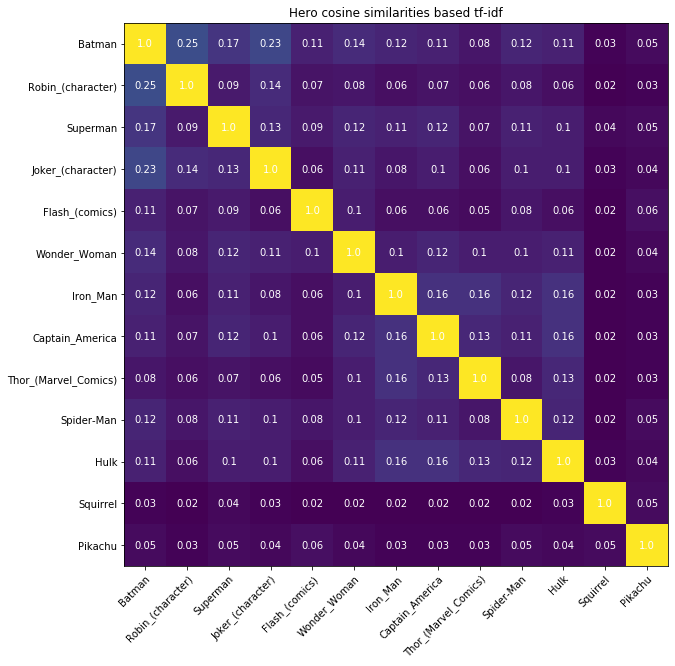

In [108]:
# Heatmap
# cf. here: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plot_matrix = np.round(matrix_cos, 2)

fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(plot_matrix)

# We want to show all ticks...
ax.set_xticks(np.arange(len(heroes)))
ax.set_yticks(np.arange(len(heroes)))
# ... and label them with the respective list entries
ax.set_xticklabels(heroes)
ax.set_yticklabels(heroes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(heroes)):
    for j in range(len(heroes)):
        text = ax.text(j, i, plot_matrix[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Hero cosine similarities based tf-idf")
#fig.tight_layout()
plt.show()